## Importing Modules 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import seaborn as sns
import statsmodels.api as sm
from statsmodels.distributions.empirical_distribution import ECDF

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df_swing = pd.read_csv("2008_swing_states.csv")

In [3]:
df_all_states = pd.read_csv("2008_all_states.csv")

In [4]:
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


### Vizualizing the Data 

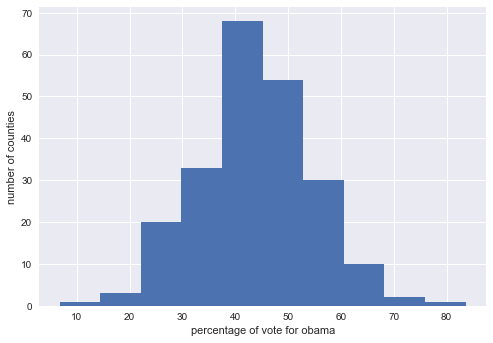

In [5]:
sns.set()
plt.hist(df_swing['dem_share'])
plt.xlabel('percentage of vote for obama')
plt.ylabel('number of counties')
plt.show()

## Generating a bee swarm plot

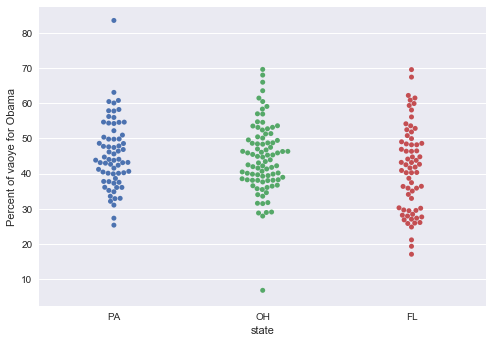

In [6]:
# Obama got 50% of vote in majority of counties in each of 3 swing states
sns.swarmplot(x='state',y='dem_share', data=df_swing)
plt.xlabel('state')
plt.ylabel('Percent of vaoye for Obama')
plt.show()

### Empirical cumulative distribution function (ECDF)

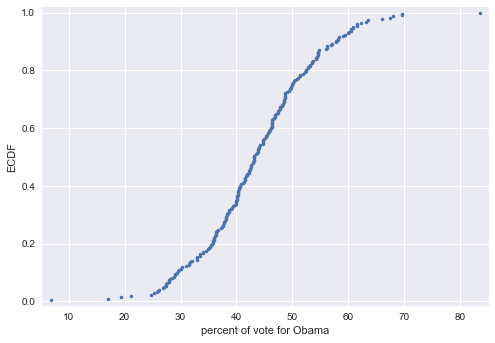

In [7]:
# Making an ECDF

x = np.sort(df_swing['dem_share'])
y = np.arange(1, len(x)+1)/ len(x)

plt.plot(x,y, marker=".", linestyle="none")
plt.xlabel('percent of vote for Obama')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

### Computing percentiles

In [8]:
ptile_dem = np.percentile(df_swing['dem_share'],[25,50,75])
percentiles = np.array([25, 50, 75])
print(ptile_dem)
print(percentiles)

[ 37.3025  43.185   49.925 ]
[25 50 75]


## Comparing percentiles to ECDF

To see how the percentiles relate to the ECDF, you will plot the percentiles of Iris versicolor petal lengths you calculated in the last exercise on the ECDF plot you generated in chapter 1. The percentile variables from the previous exercise are available in the workspace as ptiles_vers and percentiles.

Note that to ensure the Y-axis of the ECDF plot remains between 0 and 1, you will need to rescale the percentiles array accordingly - in this case, dividing it by 100.

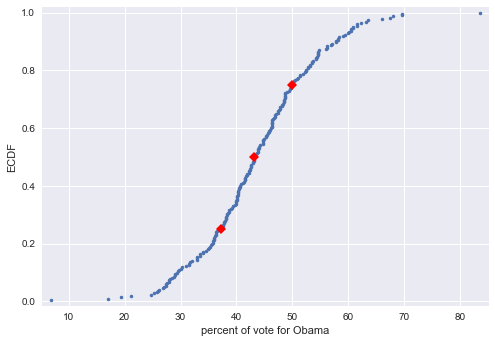

In [9]:
x = np.sort(df_swing['dem_share'])
y = np.arange(1, len(x)+1)/ len(x)

plt.plot(x,y, marker=".", linestyle="none")
plt.plot(ptile_dem, percentiles/100, marker="D",color='red', linestyle="none")
plt.xlabel('percent of vote for Obama')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

In [10]:
df_all_states.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


### Box Plot

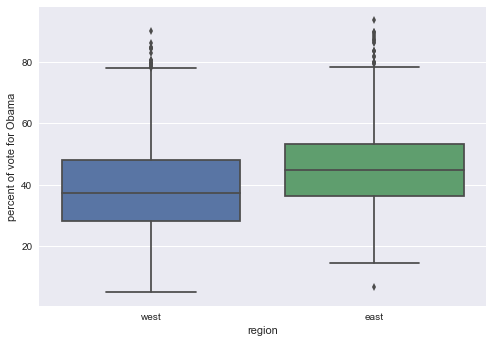

In [11]:
sns.boxplot(x='east_west',y='dem_share',
           data= df_all_states)
plt.xlabel('region')
plt.ylabel('percent of vote for Obama')
plt.show()

### Generating the Scatter plot

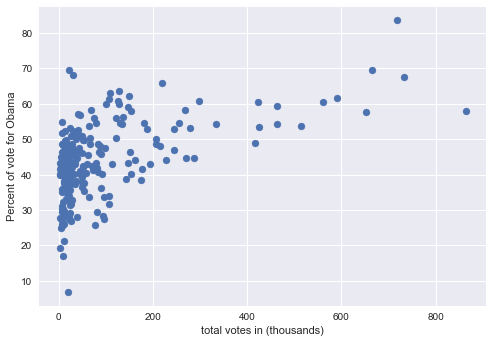

In [12]:
sns.set()
plt.scatter((df_swing['total_votes']/1000),df_swing['dem_share'])
plt.xlabel("total votes in (thousands)")
plt.ylabel("Percent of vote for Obama")
plt.show()

## Probabilistic Thinking Discrete Variables

## Hacker stats probabilities

1. Determine how to simulate data
2. Simulate many many times
3. Probability is approximately fraction of trials with the outcome of interest

### Simulating 4 coin flips

In [13]:
np.random.seed(42)

random_numbers = np.random.random(size=4)

random_numbers

array([ 0.37454012,  0.95071431,  0.73199394,  0.59865848])

In [14]:
heads = random_numbers < 0.5

heads

array([ True, False, False, False], dtype=bool)

In [15]:
np.sum(heads)

1

## Generating random numbers using the np.random module

We will be hammering the np.random module for the rest of this course and its sequel. Actually, you will probably call functions from this module more than any other while wearing your hacker statistician hat. Let's start by taking its simplest function, np.random.random() for a test spin. 

The function returns a random number between zero and one. Call np.random.random() a few times in the IPython shell. You should see numbers jumping around between zero and one.

we'll generate lots of random numbers between zero and one, and then plot a histogram of the results. If the numbers are truly random, all bars in the histogram should be of (close to) equal height.


### Simulating 4 coin flips n number of times

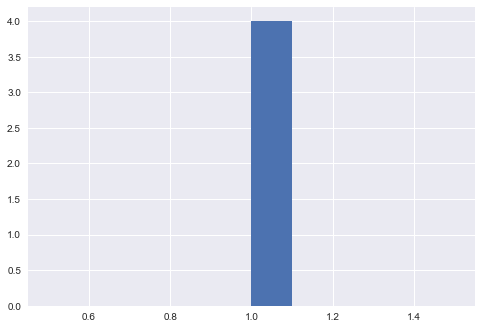

In [16]:
n_all_heads = 0

for _ in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1
        
n_all_heads /10000

plt.hist(heads)
plt.show()

## The np.random module and Bernoulli trials

Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability p of landing heads (success) and probability 1−p of landing tails (failure). In this exercise, you will write a function to perform n Bernoulli trials, perform_bernoulli_trials(n, p)

which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. To perform each Bernoulli trial, use the np.random.random() function, which returns a random number between zero and one.

In [17]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success  so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

## How many defaults might we expect ?

Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation.

You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function you wrote in the previous exercise and record how many defaults we get. 

Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

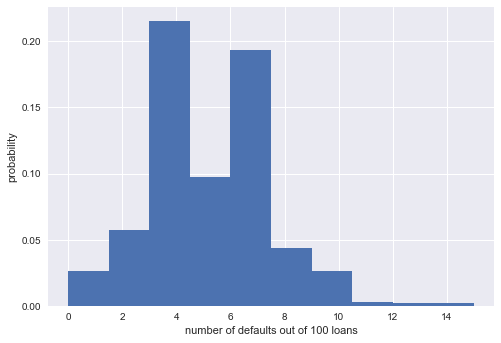

In [18]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Plot the histogram with default number of bins; label your axes
plt.hist(n_defaults, normed=True)
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('probability')

# Show the plot
plt.show()

## Will the bank fail?

Plot the number of defaults you got from the previous exercise, in your namespace as n_defaults, as a CDF. The ecdf() function you wrote in the first chapter is available.

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

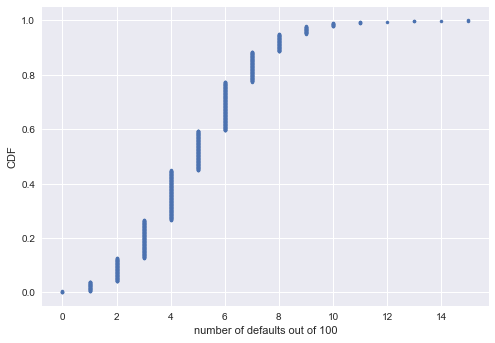

Probability of losing money = 0.022


In [19]:
def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with labeled axes
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('number of defaults out of 100')
plt.ylabel('CDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


## Sampling out of the Binomial distribution

Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using np.random.binomial().

This is identical to the calculation you did in the last set of exercises using your custom-written perform_bernoulli_trials() function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. 

After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.

Note: the random number generator is pre-seeded for you (with np.random.seed(42)) to save you typing that each time.

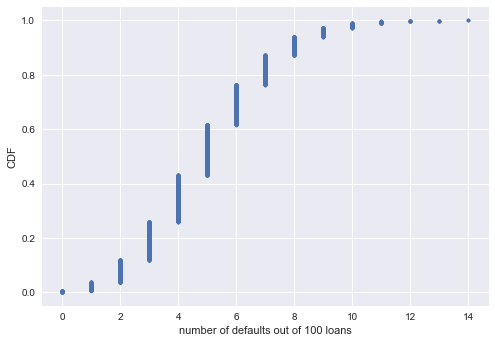

In [20]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('CDF')

# Show the plot
plt.show()


## Plotting the Binomial PMF

we will plot the PMF of the Binomial distribution as a histogram with skills you have already learned. The trick is setting up the edges of the bins to pass to plt.hist() via the bins keyword argument. 

We want the bins centered on the integers. So, the edges of the bins should be -0.5, 0.5, 1.5, 2.5, ... up to max(n_defaults) + 1.5. You can generate an array like this using np.arange() and then subtracting 0.5 from the array.


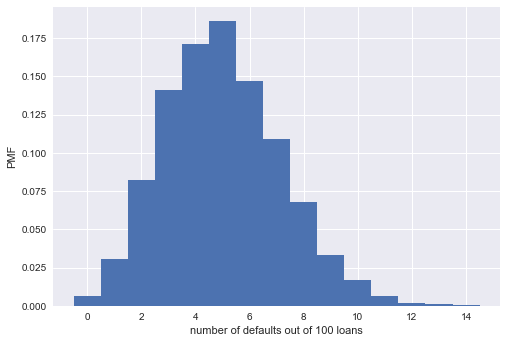

In [21]:
#Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults, normed=True, bins=bins)

# Label axes
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('PMF')

# Show the plot
plt.show()

## Relationship between Binomial and Poisson distributions

The Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. You will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, you will compute the mean and standard deviation of samples from a Binomial distribution with parameters n and p such that np=10.

In [22]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      10.0145 3.17135456075
n = 20 Binom: 10.0592 2.23523944131
n = 100 Binom: 10.0441 2.994253695
n = 1000 Binom: 10.0129 3.13963908595


## Was 2015 anamalous

1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [23]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.0072


## Probabilitic Thnking continuous variables

In [24]:
michelson_speed_of_light = pd.read_csv("michelson_speed_of_light.csv")

## checking Normaility of Michelson data

In [25]:
mean = np.mean(michelson_speed_of_light['velocity of light in air (km/s)'])
std = np.std(michelson_speed_of_light['velocity of light in air (km/s)'])
samples = np.random.normal(mean,std,size=10000)
x,y = ecdf(michelson_speed_of_light['velocity of light in air (km/s)'])
x_theor, y_theor = ecdf(samples)

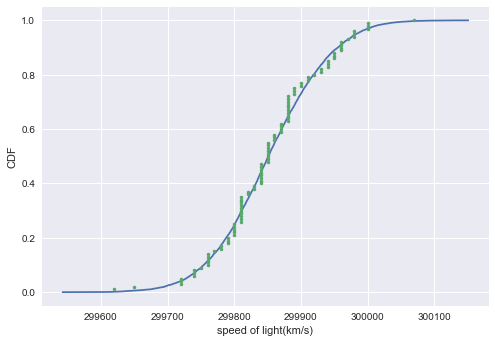

In [26]:
sns.set()
plt.plot(x_theor, y_theor)
plt.plot(x,y, marker='.',linestyle='none')
plt.xlabel('speed of light(km/s)')
plt.ylabel('CDF')
plt.show()

## The Normal PDF

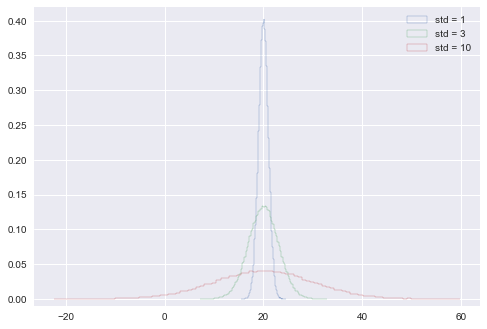

In [27]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
plt.hist(samples_std1, bins=100, normed=True, histtype='step')
plt.hist(samples_std3, bins=100, normed=True, histtype='step')
plt.hist(samples_std10, bins=100, normed=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


## Normal CDF

let's consider its CDF. Using the samples you generated in the last exercise (in your namespace as samples_std1, samples_std3, and samples_std10), generate and plot the CDFs.

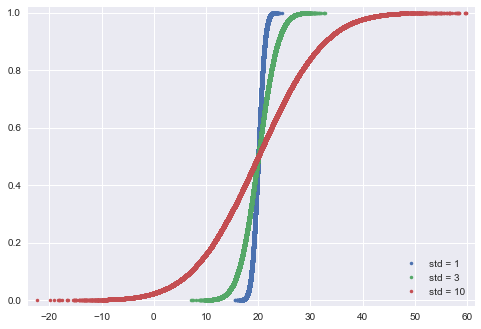

In [28]:
# Generate CDFs
x_std1,y_std1 = ecdf(samples_std1)
x_std3,y_std3 = ecdf(samples_std3)
x_std10,y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1,y_std1,marker='.',linestyle='none')
plt.plot(x_std3,y_std3,marker='.',linestyle='none')
plt.plot(x_std10,y_std10,marker='.',linestyle='none')
# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


In [29]:
Belmont = pd.read_csv("belmont.csv")

In [30]:
Belmont.head()

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,1.5
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,1.5
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,Belmont,1.5
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,Belmont,1.5
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,Belmont,1.5


## If you have a story, you can simulate it!

Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game.

Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. 

Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

In [31]:
def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

## Distribution of no-hitters and cycles

you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

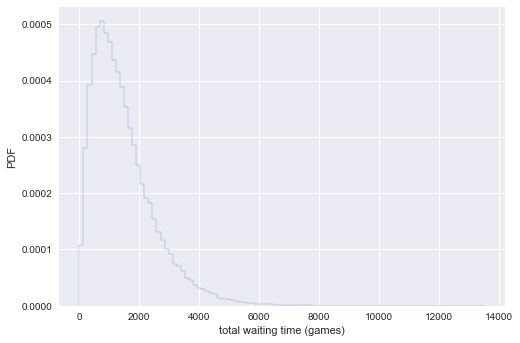

In [33]:
# Draw samples of waiting times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
plt.hist(waiting_times, bins=100, histtype='step',
             normed=True)

# Label axes
plt.xlabel('total waiting time (games)')
plt.ylabel('PDF')

# Show the plot
plt.show()


## Thank You !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!